#### **TF-IDF**    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

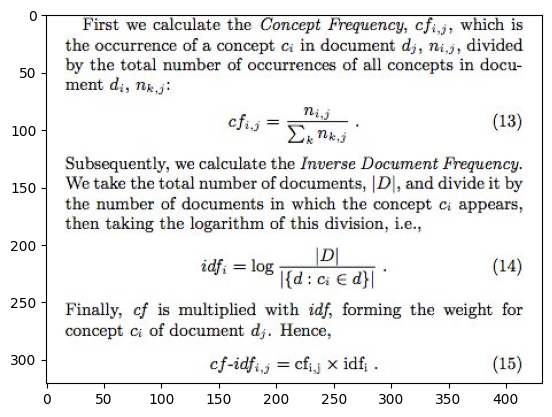

In [3]:
img = np.asarray(Image.open('tfidf.jpeg'))
#print(repr(img))
imgplot = plt.imshow(img)

#### ***Stemming Technique***
##### It is not ideal choice for words having different root forms like eat/ate/eaten

In [4]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem('ate')

'ate'

In [5]:
porter.stem('university')

'univers'

In [6]:
porter.stem('universal')

'univers'

#### ***Lemmatization Technique***
##### It is an ideal choice for words having different root forms, we need to pass the POS along with the word to get the desired result

In [7]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [8]:
lem.lemmatize('running', pos='n')   # Passing Parts of Speech as Noun

'running'

In [14]:
lem.lemmatize('running', pos='v')   # Passing Parts of Speech as Verb

'better'

In [13]:
lem.lemmatize('better', pos='a')    # Passing POS as Adjectives

'good'

In [15]:
text = "Can you please buy me an Arizona Ice Tea? It is $0.99."

In [17]:
from nltk.tokenize import word_tokenize
import nltk
tokenList = word_tokenize(text)
print(tokenList)

['Can', 'you', 'please', 'buy', 'me', 'an', 'Arizona', 'Ice', 'Tea', '?', 'It', 'is', '$', '0.99', '.']


In [18]:
print('Parts of speech :', nltk.pos_tag(tokenList) )

Parts of speech : [('Can', 'MD'), ('you', 'PRP'), ('please', 'VB'), ('buy', 'VB'), ('me', 'PRP'), ('an', 'DT'), ('Arizona', 'NNP'), ('Ice', 'NNP'), ('Tea', 'NNP'), ('?', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('$', '$'), ('0.99', 'CD'), ('.', '.')]


#### ***CountVectorizer Technique*** (Bags of Words)

In [19]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
text_data = np.array(['I Love Brazil, Brazil!','Sweden is best','Germany beats both'])

In [22]:
Count = CountVectorizer()

In [23]:
bag_of_words = Count.fit_transform(text_data)

In [26]:
bag_of_words.toarray()

array([[0, 0, 0, 2, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [31]:
Count.get_feature_names_out()

array(['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love',
       'sweden'], dtype=object)

In [32]:
import pandas as pd

In [34]:
pd.DataFrame(bag_of_words.toarray(), columns = Count.get_feature_names_out())

,beats,best,both,brazil,germany,is,love,sweden
0,0,0,0,2,0,0,1,0
1,0,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,0


#### ***TFID Technique*** (TF-IDF)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer()

In [41]:
feature_matrix = tfidf.fit_transform(text_data)
print(feature_matrix.toarray())

[[0.         0.         0.         0.89442719 0.         0.
  0.4472136  0.        ]
 [0.         0.57735027 0.         0.         0.         0.57735027
  0.         0.57735027]
 [0.57735027 0.         0.57735027 0.         0.57735027 0.
  0.         0.        ]]


In [42]:
pd.DataFrame(feature_matrix.toarray(), columns = Count.get_feature_names_out())

,beats,best,both,brazil,germany,is,love,sweden
0,0.00000,0.00000,0.00000,0.894427,0.00000,0.00000,0.447214,0.00000
1,0.00000,0.57735,0.00000,0.000000,0.00000,0.57735,0.000000,0.57735
2,0.57735,0.00000,0.57735,0.000000,0.57735,0.00000,0.000000,0.00000


In [51]:
sorted(tfidf.vocabulary_.items(), key=lambda x:x[1])

[('beats', 0),
 ('best', 1),
 ('both', 2),
 ('brazil', 3),
 ('germany', 4),
 ('is', 5),
 ('love', 6),
 ('sweden', 7)]